# Creación del modelo

In [ ]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
import random
import matplotlib.pyplot as plt
import numpy as np
import keras

CURRENT_DIR = Path('/content/drive')
from google.colab import drive
drive.mount(str(CURRENT_DIR))

CURRENT_DIR = CURRENT_DIR.joinpath('MyDrive','restauracion')
MODULES_DIR = CURRENT_DIR.joinpath('src')
sys.path.append(str(MODULES_DIR))
DATA_DIR = CURRENT_DIR.joinpath('Process','DATA_SET_ENTRENAMIENTO')

%config InlineBackend.figure_format = 'retina'
import tensorflow as tf
from keras.models import Model, load_model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Lista de todas las GPUs disponibles en el sistema
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    # Si hay al menos una GPU disponible, establecer el uso de solo una GPU
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')

    # Limitar la capacidad de la GPU a 10 GB
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=12*1024)])  # 10 GB en MB

    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print("Usando solo 1 de", len(gpus), "GPU físicas y", len(logical_gpus), "GPU lógicas")
else:
    print("No se encontraron GPUs disponibles.")

Usando solo 1 de 1 GPU físicas y 1 GPU lógicas


In [ ]:

x_input, y_input = 1200,850


----
# Carga de datos

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import img_to_array, load_img

In [ ]:
files_clean = sorted([f for f in DATA_DIR.joinpath('CLEAN').iterdir() if f.is_file()])
files_clean = sorted(files_clean)

In [ ]:
#directories_noisy = sorted([f for f in DATA_DIR.joinpath('NOISY').iterdir() if f.is_dir()])
#files_noisy = []
#for folder in directories_clean:
#    files_noisy = sorted(DATA_DIR.joinpath('CLEAN',folder.name).glob('*.jpg')) + files_noisy

#files_noisy = sorted(files_noisy)

In [ ]:
files_noisy = sorted([f for f in DATA_DIR.joinpath('NOISY').iterdir() if f.is_file()])
files_noisy = sorted(files_noisy)

In [ ]:
x_train_list, x_test_list, y_train_list, y_test_list = train_test_split(
    files_noisy,
    files_clean,
    test_size=0.2
)

In [ ]:
import data_load

In [ ]:
trainning_generator = data_load.CustomImageDataGenerator(
    image_paths_noisy=x_train_list,
    image_paths_clean=y_train_list,
    batch_size=8,
    target_size=(x_input, y_input),
    class_mode='input',
    shuffle=True)


In [ ]:
trainning_generator = data_load.CustomImageDataGenerator(
    image_paths_noisy=x_train_list,
    image_paths_clean=y_train_list,
    batch_size=8,
    target_size=(x_input, y_input),
    class_mode='input',
    shuffle=True)


testing_generator = data_load.CustomImageDataGenerator(
    image_paths_noisy=x_test_list,
    image_paths_clean=y_test_list,
    batch_size=8,
    target_size=(x_input, y_input),
    class_mode='input',
    shuffle=True)

-----

# Creación del modelo

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from keras.optimizers import Adam
from keras.models import Model, Sequential
from keras.layers import Activation

In [ ]:
'''
input = Input(
    shape=(x_input,y_input, 1),
    name= 'Image_Input')
'''

"\ninput = Input(\n    shape=(x_input,y_input, 1),\n    name= 'Image_Input')\n"

## Decoder

In [ ]:
'''
x = Conv2D(
    filters = 64,
    kernel_size = (3,3),
    activation = 'relu',
    padding = 'same',
    name = 'Convolutional_Layer_1')(input)

x = Conv2D(
    filters = 32,
    kernel_size = (3,3),
    activation = 'relu',
    padding = 'same',
    name = 'Convolutional_Layer_2')(x)

x = Conv2D(
    filters = 16,
    kernel_size = (3,3),
    activation = 'relu',
    padding = 'same',
    name = 'Convolutional_Layer_3')(x)

x = Conv2D(
    filters = 8,
    kernel_size = (3,3),
    activation = 'relu',
    padding = 'same',
    name = 'Convolutional_Layer_4')(x)

x = BatchNormalization()(x)
'''

"\nx = Conv2D(\n    filters = 64,\n    kernel_size = (3,3),\n    activation = 'relu',\n    padding = 'same',\n    name = 'Convolutional_Layer_1')(input)\n\nx = Conv2D(\n    filters = 32,\n    kernel_size = (3,3),\n    activation = 'relu',\n    padding = 'same',\n    name = 'Convolutional_Layer_2')(x)\n\nx = Conv2D(\n    filters = 16,\n    kernel_size = (3,3),\n    activation = 'relu',\n    padding = 'same',\n    name = 'Convolutional_Layer_3')(x)\n\nx = Conv2D(\n    filters = 8,\n    kernel_size = (3,3),\n    activation = 'relu',\n    padding = 'same',\n    name = 'Convolutional_Layer_4')(x)\n\nx = BatchNormalization()(x)\n"

## Encoder


In [ ]:
"""
x = Conv2D(
    filters = 8,
    kernel_size = (3,3),
    activation = 'relu',
    padding = 'same',
    name = 'Convolutional_Layer_5_0')(x)

x = Conv2D(
    filters = 16,
    kernel_size = (3,3),
    activation = 'relu',
    padding = 'same',
    name = 'Convolutional_Layer_5')(x)

x = Conv2D(
    filters = 32,
    kernel_size = (3,3),
    activation = 'relu',
    padding = 'same',
    name = 'Convolutional_Layer_6')(x)

x = Conv2D(
    filters = 64,
    kernel_size = (3,3),
    activation = 'relu',
    padding = 'same',
    name = 'Convolutional_Layer_7')(x)

x = BatchNormalization()(x)

decoded = Conv2D(
    filters = 1,
    kernel_size= (3, 3),
    activation='sigmoid',
    padding='same',
    name = 'decoder')(x)
"""

"\nx = Conv2D(\n    filters = 8,\n    kernel_size = (3,3),\n    activation = 'relu',\n    padding = 'same',\n    name = 'Convolutional_Layer_5_0')(x)\n\nx = Conv2D(\n    filters = 16,\n    kernel_size = (3,3),\n    activation = 'relu',\n    padding = 'same',\n    name = 'Convolutional_Layer_5')(x)\n\nx = Conv2D(\n    filters = 32,\n    kernel_size = (3,3),\n    activation = 'relu',\n    padding = 'same',\n    name = 'Convolutional_Layer_6')(x)\n\nx = Conv2D(\n    filters = 64,\n    kernel_size = (3,3),\n    activation = 'relu',\n    padding = 'same',\n    name = 'Convolutional_Layer_7')(x)\n\nx = BatchNormalization()(x)\n\ndecoded = Conv2D(\n    filters = 1,\n    kernel_size= (3, 3),\n    activation='sigmoid',\n    padding='same',\n    name = 'decoder')(x)\n"

In [ ]:
#autoencoder = Model(input,decode)
"""
hola
"""
autoencoder = load_model(str(DATA_DIR.joinpath('modelo_v_3_1.h5')))
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Image_Input (InputLayer)    [(None, 1200, 850, 1)]    0         
                                                                 
 Convolutional_Layer_1 (Conv  (None, 1200, 850, 64)    640       
 2D)                                                             
                                                                 
 Convolutional_Layer_2 (Conv  (None, 1200, 850, 32)    18464     
 2D)                                                             
                                                                 
 Convolutional_Layer_3 (Conv  (None, 1200, 850, 16)    4624      
 2D)                                                             
                                                                 
 Convolutional_Layer_4 (Conv  (None, 1200, 850, 8)     1160      
 2D)                                                         

In [ ]:
optimizer1 = tf.keras.optimizers.SGD(momentum=0.9)

In [ ]:
autoencoder.compile(optimizer=optimizer1, loss='mse', metrics=['mae',tf.keras.metrics.LogCoshError()])

In [ ]:
tf.keras.mixed_precision.set_global_policy('mixed_float16')

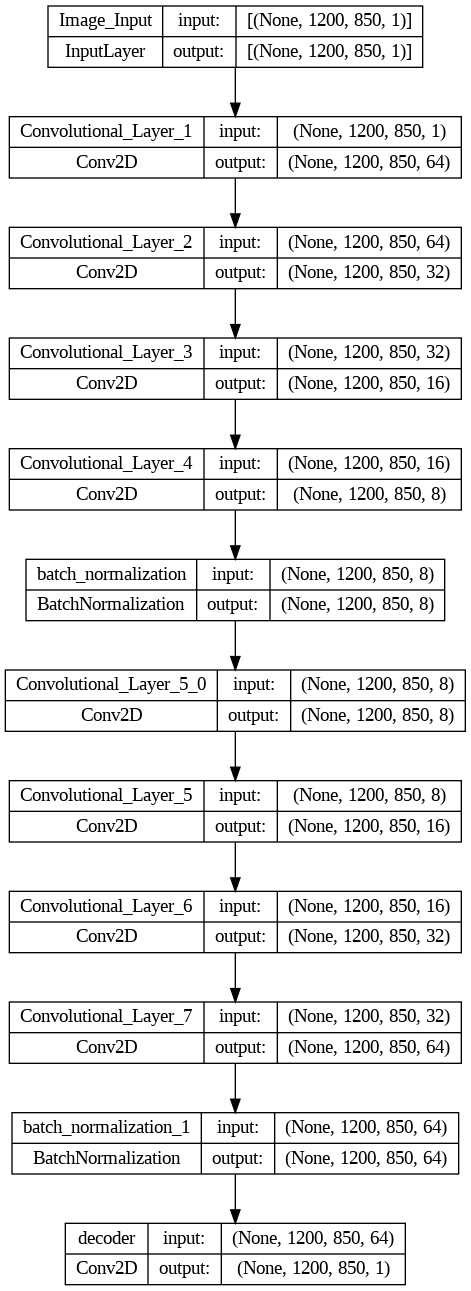

In [ ]:
keras.utils.plot_model(autoencoder, "autoencoder_v_3_0.png", show_shapes=True)

------

# Carga del modelo anterior

modelo_previamente_entrenado = load_model(str(DATA_DIR.joinpath('modelo_v_0_3.h5')))
capas_seleccionadas = ['Convolutional_Layer_1','Convolutional_Layer_2','Convolutional_Layer_3']
aaa1 = ['Convolutional_Layer_3']
pesos_seleccionados = [modelo_previamente_entrenado.get_layer(nombre_capa).get_weights() for nombre_capa in capas_seleccionadas]
pesos_seleccionados2 = [modelo_previamente_entrenado.get_layer(nombre_capa).get_weights() for nombre_capa in aaa1]


# Establecer los pesos en el nuevo modelo
for capa, peso in zip(autoencoder.layers[1:], pesos_seleccionados):
    capa.set_weights(peso)

for capa, peso in zip(autoencoder.layers[5:], pesos_seleccionados2):
    capa.set_weights(peso)

In [ ]:
autoencoder.fit(
    trainning_generator,
    epochs=10,
    steps_per_epoch=len(trainning_generator),
    shuffle=True,
    validation_data=testing_generator,
    validation_steps=len(testing_generator)
)

Epoch 1/10
381/381 [==============================] - 3284s 9s/step - loss: 0.0050 - mae: 0.0351 - logcosh: 0.0024 - val_loss: 0.0050 - val_mae: 0.0294 - val_logcosh: 0.0024
Epoch 2/10
381/381 [==============================] - 605s 2s/step - loss: 0.0050 - mae: 0.0350 - logcosh: 0.0024 - val_loss: 0.0055 - val_mae: 0.0432 - val_logcosh: 0.0027
Epoch 3/10
381/381 [==============================] - 605s 2s/step - loss: 0.0050 - mae: 0.0348 - logcosh: 0.0024 - val_loss: 0.0050 - val_mae: 0.0307 - val_logcosh: 0.0024
Epoch 4/10
381/381 [==============================] - 603s 2s/step - loss: 0.0049 - mae: 0.0347 - logcosh: 0.0024 - val_loss: 0.0050 - val_mae: 0.0306 - val_logcosh: 0.0024
Epoch 5/10
381/381 [==============================] - 604s 2s/step - loss: 0.0049 - mae: 0.0347 - logcosh: 0.0024 - val_loss: 0.0048 - val_mae: 0.0286 - val_logcosh: 0.0023
Epoch 6/10
381/381 [==============================] - 603s 2s/step - loss: 0.0049 - mae: 0.0346 - logcosh: 0.0024 - val_loss: 0.0056 -

In [ ]:
autoencoder.save(str(DATA_DIR.joinpath('modelo_v_3_2.h5')))

-----

Prueba de resultados

In [ ]:
x,y = trainning_generator.__getitem__(random.randint(0,9))

In [ ]:
output1 = autoencoder.predict(y)

1/1 [==============================] - 0s 196ms/step


In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img

In [ ]:
i = random.randint(0,5)
fig, ax = plt.subplots(3,1, figsize=(15,30))

a1 = array_to_img(np.array(x[i] * 255, dtype=np.uint8))
ax[0].imshow(a1, cmap='gray')
ax[0].set_title('Imagen con defectos')
ax[0].axis(False)

a2 = array_to_img(np.array(y[i] * 255, dtype=np.uint8))
ax[1].imshow(a2,cmap='gray')
ax[1].set_title('Imagen real limpia')
ax[1].axis(False)

a3 = array_to_img(np.array(output1[i] * 255, dtype=np.uint8))
ax[2].imshow(a1,cmap='gray')
ax[2].set_title('Procesada')
ax[2].axis(False)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

----

In [ ]:
trainning_generator = data_load.CustomImageDataGenerator(
    image_paths_noisy=x_train_list,
    image_paths_clean=y_train_list,
    batch_size=8,
    target_size=(x_input, y_input),
    class_mode='input',
    shuffle=True)


testing_generator = data_load.CustomImageDataGenerator(
    image_paths_noisy=x_test_list,
    image_paths_clean=y_test_list,
    batch_size=8,
    target_size=(x_input, y_input),
    class_mode='input',
    shuffle=True)

In [ ]:
autoencoder.fit(
    trainning_generator,
    epochs=20,
    steps_per_epoch=len(trainning_generator),
    shuffle=True,
    validation_data=testing_generator,
    validation_steps=len(testing_generator)
)

Epoch 1/20
381/381 [==============================] - 609s 2s/step - loss: 0.0048 - mae: 0.0342 - logcosh: 0.0023 - val_loss: 0.0050 - val_mae: 0.0319 - val_logcosh: 0.0024
Epoch 2/20
381/381 [==============================] - 609s 2s/step - loss: 0.0048 - mae: 0.0342 - logcosh: 0.0023 - val_loss: 0.0047 - val_mae: 0.0292 - val_logcosh: 0.0023
Epoch 3/20
381/381 [==============================] - 602s 2s/step - loss: 0.0048 - mae: 0.0341 - logcosh: 0.0023 - val_loss: 0.0050 - val_mae: 0.0328 - val_logcosh: 0.0024
Epoch 4/20
381/381 [==============================] - 602s 2s/step - loss: 0.0048 - mae: 0.0341 - logcosh: 0.0023 - val_loss: 0.0049 - val_mae: 0.0304 - val_logcosh: 0.0024
Epoch 5/20
381/381 [==============================] - 609s 2s/step - loss: 0.0048 - mae: 0.0341 - logcosh: 0.0023 - val_loss: 0.0049 - val_mae: 0.0313 - val_logcosh: 0.0024
Epoch 6/20
381/381 [==============================] - 609s 2s/step - loss: 0.0047 - mae: 0.0339 - logcosh: 0.0023 - val_loss: 0.0051 - 

UnknownError: ignored

In [ ]:
autoencoder.save(str(DATA_DIR.joinpath('modelo_v_3_3.h5')))

In [ ]:
x,y = testing_generator.__getitem__(random.randint(0,9))
output1 = autoencoder.predict(y)
i = random.randint(0,5)
fig, ax = plt.subplots(3,1, figsize=(15,30))

a1 = array_to_img(np.array(x[i] * 255, dtype=np.uint8))
ax[0].imshow(a1, cmap='gray')
ax[0].set_title('Imagen con defectos')
ax[0].axis(False)

a2 = array_to_img(np.array(y[i] * 255, dtype=np.uint8))
ax[1].imshow(a2,cmap='gray')
ax[1].set_title('Imagen real limpia')
ax[1].axis(False)

a3 = array_to_img(np.array(output1[i] * 255, dtype=np.uint8))
ax[2].imshow(a1,cmap='gray')
ax[2].set_title('Procesada')
ax[2].axis(False)
plt.show()

In [ ]:
'/content/drive/MyDrive/restauracion/Process/DATA_SET_ENTRENAMIENTO/CLEAN/HACT.1S.10001_00015_izq.jpg'

'/content/drive/MyDrive/restauracion/Process/DATA_SET_ENTRENAMIENTO/CLEAN/HACT.1S.10001_00015_izq.jpg'

-----

In [ ]:
trainning_generator = data_load.CustomImageDataGenerator(
    image_paths_noisy=x_train_list,
    image_paths_clean=y_train_list,
    batch_size=8,
    target_size=(x_input, y_input),
    class_mode='input',
    shuffle=True)


testing_generator = data_load.CustomImageDataGenerator(
    image_paths_noisy=x_test_list,
    image_paths_clean=y_test_list,
    batch_size=8,
    target_size=(x_input, y_input),
    class_mode='input',
    shuffle=True)

In [ ]:
autoencoder.fit(
    trainning_generator,
    epochs=20,
    steps_per_epoch=len(trainning_generator),
    shuffle=True,
    validation_data=testing_generator,
    validation_steps=len(testing_generator)
)

In [ ]:
autoencoder.save(str(DATA_DIR.joinpath('modelo_v_3_4.h5')))

In [ ]:
x,y = testing_generator.__getitem__(random.randint(0,9))
output1 = autoencoder.predict(y)
i = random.randint(0,5)
fig, ax = plt.subplots(3,1, figsize=(15,30))

a1 = array_to_img(np.array(x[i] * 255, dtype=np.uint8))
ax[0].imshow(a1, cmap='gray')
ax[0].set_title('Imagen con defectos')
ax[0].axis(False)

a2 = array_to_img(np.array(y[i] * 255, dtype=np.uint8))
ax[1].imshow(a2,cmap='gray')
ax[1].set_title('Imagen real limpia')
ax[1].axis(False)

a3 = array_to_img(np.array(output1[i] * 255, dtype=np.uint8))
ax[2].imshow(a1,cmap='gray')
ax[2].set_title('Procesada')
ax[2].axis(False)
plt.show()

In [ ]:
trainning_generator = data_load.CustomImageDataGenerator(
    image_paths_noisy=x_train_list,
    image_paths_clean=y_train_list,
    batch_size=8,
    target_size=(x_input, y_input),
    class_mode='input',
    shuffle=True)


testing_generator = data_load.CustomImageDataGenerator(
    image_paths_noisy=x_test_list,
    image_paths_clean=y_test_list,
    batch_size=8,
    target_size=(x_input, y_input),
    class_mode='input',
    shuffle=True)

In [ ]:
autoencoder.fit(
    trainning_generator,
    epochs=20,
    steps_per_epoch=len(trainning_generator),
    shuffle=True,
    validation_data=testing_generator,
    validation_steps=len(testing_generator)
)

In [ ]:
autoencoder.save(str(DATA_DIR.joinpath('modelo_v_2_5.h5')))

In [ ]:
x,y = testing_generator.__getitem__(random.randint(0,9))
output1 = autoencoder.predict(y)
i = random.randint(0,5)
fig, ax = plt.subplots(3,1, figsize=(15,30))

a1 = array_to_img(np.array(x[i] * 255, dtype=np.uint8))
ax[0].imshow(a1, cmap='gray')
ax[0].set_title('Imagen con defectos')
ax[0].axis(False)

a2 = array_to_img(np.array(y[i] * 255, dtype=np.uint8))
ax[1].imshow(a2,cmap='gray')
ax[1].set_title('Imagen real limpia')
ax[1].axis(False)

a3 = array_to_img(np.array(output1[i] * 255, dtype=np.uint8))
ax[2].imshow(a1,cmap='gray')
plt.show()

